## Imports

In [62]:
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import argparse

# Define the base path where your pickle file is located
base_path2 = '/home/bosfab01/SpeakerVerificationBA/pretraining/exp/mask01-base-f128-t2-b24-lr1e-4-m400-pretrain_joint-asli'
base_path3 = '/home/bosfab01/SpeakerVerificationBA/pretraining/exp/mask01-base-f128-t2-b24-lr1e-4-m400-pretrain_joint-asli-20240412-172636'

## Model Configuration

In [63]:
# Construct the full path to the 'args.pkl' file
args_file_path2 = os.path.join(base_path2, 'args.pkl')

# Load the arguments from the pickle file
with open(args_file_path2, 'rb') as f:
    args2 = pickle.load(f)

# Convert the Namespace to a dictionary if it is of that type
if isinstance(args2, argparse.Namespace):
    args_dict2 = vars(args2)
else:
    print("The loaded 'args' object is not an argparse.Namespace. Its type is:", type(args2))
    exit()

# Determine the maximum width of the argument names for alignment
max_key_length = max(len(key) for key in args_dict2.keys())

# Print the arguments in a structured table format
print(f"{'Argument':<{max_key_length}} | Value")
print("-" * (max_key_length + 3) + "+" + "-" * 30)  # Adjust 30 if you expect wider values

for key, value in args_dict2.items():
    print(f"{key:<{max_key_length}} | {value}")

Argument            | Value
----------------------+------------------------------
data_train          | /home/bosfab01/SpeakerVerificationBA/data/audioset2M_librispeech960.json
data_val            | /home/bosfab01/SpeakerVerificationBA/data/audioset_eval.json
data_eval           | None
label_csv           | /home/bosfab01/SpeakerVerificationBA/data/label_information.csv
n_class             | 527
dataset             | asli
dataset_mean        | -3.6925695
dataset_std         | 4.020388
target_length       | 1024
num_mel_bins        | 128
exp_dir             | ./exp/mask01-base-f128-t2-b24-lr1e-4-m400-pretrain_joint-asli
lr                  | 0.0001
warmup              | True
optim               | adam
batch_size          | 24
num_workers         | 16
n_epochs            | 9
lr_patience         | 2
adaptschedule       | False
n_print_steps       | 100
save_model          | True
freqm               | 0
timem               | 0
mixup               | 0.0
bal                 | none
fstride   

## Epochs, Iterations and Time Required

### Compare the time required for training the model with 2 and 3 GPUs

In [64]:
# open progress files
with open(os.path.join(base_path2, 'progress.pkl'), 'rb') as f:
    progress2 = pickle.load(f)

with open(os.path.join(base_path3, 'progress.pkl'), 'rb') as f:
    progress3 = pickle.load(f)

[  4000   8000  12000  16000  20000  24000  28000  32000  36000  40000
  44000  48000  52000  56000  60000  64000  68000  72000  76000  80000
  84000  88000  92000  96000 100000 104000 108000 112000 116000 120000
 124000 128000 132000 136000 140000 144000 148000 152000 156000 160000
 164000 168000 172000 176000 180000 184000 188000 192000 196000 200000
 204000 208000 212000 216000 220000 224000]
[ 4000  8000 12000]
[  2690.31878138   5377.98913717   8064.44074345  10751.84325576
  13438.87410688  16126.71938157  18816.07888532  21504.43292069
  24193.04987001  26881.81222701  29569.95150185  32258.31678391
  34945.03226399  37631.24411774  40318.66826034  43005.6039362
  45693.41215158  48377.341295    51061.49239182  53746.98175049
  56431.53063893  59118.27661061  61802.07803893  64485.08744693
  67171.00687289  69857.15871429  72542.4926188   75228.7593348
  77915.05766916  80600.35691094  83286.16839266  85973.42595506
  88661.17114925  91349.99408078  94038.8612566   96725.6890673

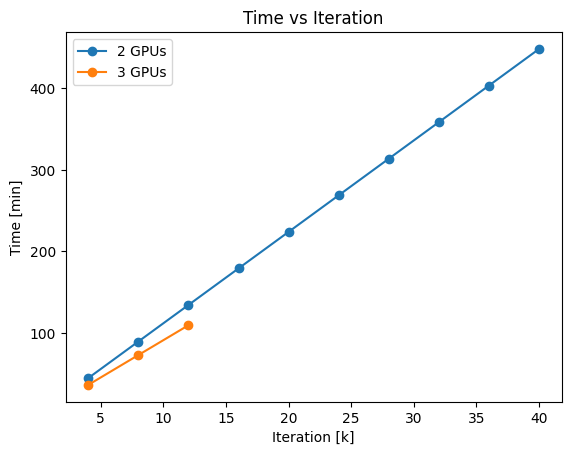

In [65]:
# get the iteration (is at the second position in the list of progress)
iteration2 = np.array([x[1] for x in progress2])
print(iteration2)

# get the iteration (is at the second position in the list of progress)
iteration3 = np.array([x[1] for x in progress3])
print(iteration3)

# get time (is at the fourth position in the list of progress)
time2 = np.array([x[3] for x in progress2])
print(time2)

# get time (is at the fourth position in the list of progress)
time3 = np.array([x[3] for x in progress3])
print(time3)


# plot the time vs iteration for the first 20k iterations
plt.plot(iteration2[:10]/1e3, time2[:10]/60, "o-", label='2 GPUs')
plt.plot(iteration3[:10]/1e3, time3[:10]/60, "o-", label='3 GPUs')
plt.xlabel('Iteration [k]')
plt.ylabel('Time [min]')
plt.title('Time vs Iteration')
plt.legend()
plt.show()


In [66]:
# calculate total time required for all 800k iterations based on the number of iterations and the time per iteration
n_iterations = 800000
time_per_iteration2 = time2[-1] / iteration2[-1]
time_per_iteration3 = time3[-1] / iteration3[-1]

total_time2 = time_per_iteration2 * n_iterations
total_time3 = time_per_iteration3 * n_iterations

print(f"Total time for 2 GPUs: {total_time2/3600:.2f} hours")
print(f"Total time for 3 GPUs: {total_time3/3600:.2f} hours")

Total time for 2 GPUs: 149.24 hours
Total time for 3 GPUs: 121.76 hours


## Training and Evaluation Loss

In [67]:
# Construct the full path to the 'result.csv' file
result_file_path2 = os.path.join(base_path2, 'result.csv')
result_file_path3 = os.path.join(base_path3, 'result.csv')

# Load the result from the csv file
result2 = np.genfromtxt(result_file_path2, delimiter=',')
result3 = np.genfromtxt(result_file_path3, delimiter=',')

acc_train2 = result2[:, 0] # The first column
loss_train2 = result2[:, 1] # The second column
acc_eval2 = result2[:, 2] # The third column
mse_eval2 = result2[:, 3] # The fourth column

acc_train3 = result3[:, 0] # The first column
loss_train3 = result3[:, 1] # The second column
acc_eval3 = result3[:, 2] # The third column
mse_eval3 = result3[:, 3] # The fourth column

# Define the format for each column
header_format = " {:>5}  | {:<10} | {:<10} | {:<10} | {:<10}"
row_format = "{:>5}k  | {:<10.5f} | {:<10.5f} | {:<10.5f} | {:<10.5f}"

# Print the table headers
print(header_format.format("iter", "acc_train", "loss_train", "acc_eval", "mse_eval"))
print("-" * 60)  # Adjust the total length to fit your headers and column data

# Print each row of data
for i in range(len(acc_train2)):
    print(row_format.format(iteration2[i] // 1000, acc_train2[i], loss_train2[i], acc_eval2[i], mse_eval2[i]))

  iter  | acc_train  | loss_train | acc_eval   | mse_eval  
------------------------------------------------------------
    4k  | 0.03236    | 6.55856    | 0.11602    | 0.04718   
    8k  | 0.18079    | 4.10453    | 0.17899    | 0.03877   
   12k  | 0.24000    | 3.70113    | 0.21364    | 0.03688   
   16k  | 0.27926    | 3.47886    | 0.24061    | 0.03571   
   20k  | 0.30198    | 3.35673    | 0.26089    | 0.03459   
   24k  | 0.31992    | 3.25051    | 0.27116    | 0.03404   
   28k  | 0.33234    | 3.17550    | 0.28210    | 0.03366   
   32k  | 0.34172    | 3.11965    | 0.28807    | 0.03361   
   36k  | 0.34943    | 3.07685    | 0.29486    | 0.03289   
   40k  | 0.35573    | 3.03765    | 0.30347    | 0.03266   
   44k  | 0.36304    | 2.99690    | 0.30687    | 0.03268   
   48k  | 0.36842    | 2.96754    | 0.31099    | 0.03231   
   52k  | 0.37223    | 2.94176    | 0.31674    | 0.03201   
   56k  | 0.37694    | 2.91867    | 0.31957    | 0.03191   
   60k  | 0.38068    | 2.89409    | 0.3

### compare the training and evaluation loss for the model trained with 2 and 3 GPUs

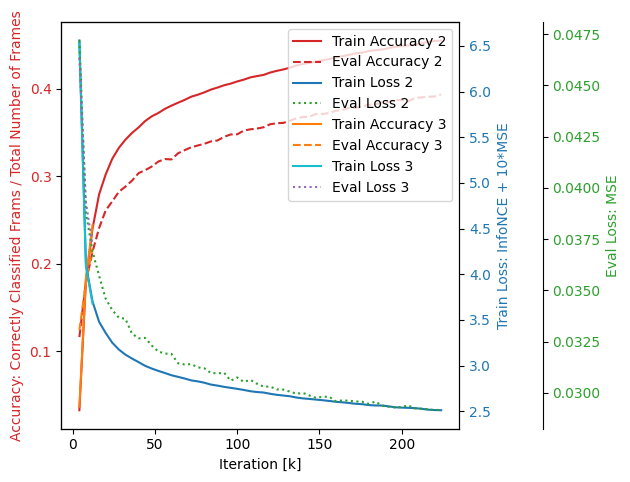

In [70]:
fig, ax1 = plt.subplots()

color_train = 'tab:red'
ax1.set_xlabel('Iteration [k]')
ax1.set_ylabel('Accuracy: Correctly Classified Frams / Total Number of Frames', color=color_train)
line1, = ax1.plot(iteration2/1e3, acc_train2, color=color_train, label='Train Accuracy 2')
line2, = ax1.plot(iteration2/1e3, acc_eval2, color=color_train, linestyle='dashed', label='Eval Accuracy 2')
line5, = ax1.plot(iteration3/1e3, acc_train3, color='tab:orange', label='Train Accuracy 3')
line6, = ax1.plot(iteration3/1e3, acc_eval3, color='tab:orange', linestyle='dashed', label='Eval Accuracy 3')
ax1.tick_params(axis='y', labelcolor=color_train)

ax2 = ax1.twinx()
color_loss = 'tab:blue'
ax2.set_ylabel('Train Loss: InfoNCE + 10*MSE', color=color_loss)
line3, = ax2.plot(iteration2/1e3, loss_train2, color=color_loss, label='Train Loss 2')
line7, = ax2.plot(iteration3/1e3, loss_train3, color='tab:cyan', label='Train Loss 3')
ax2.tick_params(axis='y', labelcolor=color_loss)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax3
color_eval_loss = 'tab:green'
ax3.set_ylabel('Eval Loss: MSE', color=color_eval_loss)
line4, = ax3.plot(iteration2/1e3, mse_eval2, color=color_eval_loss, linestyle='dotted', label='Eval Loss 2')
line8, = ax3.plot(iteration3/1e3, mse_eval3, color='tab:purple', linestyle='dotted', label='Eval Loss 3')
ax3.tick_params(axis='y', labelcolor=color_eval_loss)

# Collect all lines and labels for the legend
lines = [line1, line2, line3, line4, line5, line6, line7, line8]
labels = [line.get_label() for line in lines]

# Place a single legend on the plot
ax1.legend(lines, labels, loc='upper right')

fig.tight_layout()
plt.show()